**Вxодные значения**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import g

L: float = 10
H: list[float] = [0.5, 1, 1.5, 2, 2.5, 3]
A: list[float] = [0.5, 1, 1.5, 2, 2.5, 3]
m: float = 5
y0: float = 1
x1: float = np.sqrt(2 * L - 1)
x0: float = -x1
dt: float = 0.0001
vy0: float = 0.0
vx0: float = 0.0

**Функции приращения компонентов скоростей и координат**

In [6]:
def get_next_vy(previous_vy: float) -> float:
    """
    Calculates next y-component of the velocity of the pendulum.
    :param previous_vy: previous y-component of the velocity of the pendulum
    :return: next y-component of the velocity of the pendulum
    """
    return previous_vy + g * dt


def get_next_y(previous_y: float, current_vy: float) -> float:
    """
    Calculates next y coordinate of the pendulum.
    :param previous_y: previous y coordinate of the pendulum
    :param current_vy: current y-component of the velocity of the pendulum
    :return: next y coordinate of the pendulum
    """
    return previous_y - current_vy * dt


def get_next_vx(
        previous_vx: float, 
        T_4: float, 
        acceleration_coefficient: int = 1
) -> float:
    """
    Calculates next x-component of the velocity of the pendulum.
    :param previous_vx: previous x-component of the velocity of the pendulum
    :param T_4: period / 4 time got from y coordinates
    :param acceleration_coefficient: coefficient of direction of acceleration
    :return: next x-component of the velocity of the pendulum
    """
    return previous_vx + acceleration_coefficient * np.sqrt(2 * g * y0) / T_4 * 4  * dt


def get_next_x(previous_x: float, current_vx: float) -> float:
    """
    Calculates next x coordinate of the pendulum.
    :param previous_x: previous x coordinate of the pendulum
    :param current_vx: current x-component of the velocity of the pendulum
    :return: next x coordinate of the pendulum
    """
    return previous_x + current_vx * dt

**Условия остановки (моменты, когда вступает ограничение подвеса маятника)**

In [7]:
def y_stoppage_condition(
        current_y: float,
        next_velocity_y: float
) -> bool:
    """
    Checks whether pendulum is reached the lowest point of its movement
    available by its length.
    :param current_y: current y coordinate of the ball
    :param next_velocity_y: next y-component of the velocity of the ball
    :return: True if the pendulum's next y coordinate is less than 0, False otherwise
    """
    return get_next_y(current_y, next_velocity_y) < 0.0


def x_stoppage_condition(
        current_x: float,
        next_velocity_x: float
) -> bool:
    """
    Checks whether pendulum is reached the lowest point of its movement
    available by its length.
    :param current_x: current x coordinate of the ball
    :param next_velocity_x: next x-component of the velocity of the ball
    :return: True if the pendulum's next x coordinate is greater than 0, False otherwise
    """
    return abs(get_next_x(current_x, next_velocity_x)) < 0.001

**Фукнкция построения графиков**

In [8]:
def plot_function(
        data: tuple[list[float], list[float]], 
        xlabel: str = 'x',
        ylabel: str = 'y',
) -> None:
    Y, T = data

    plt.plot(T, Y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

**Моделирование изменения координат по оси y**

In [9]:
def trace_y(iterations: int) -> tuple[list[float], list[float], float]:
    Y: list[float] = []
    X: list[float] = []
    T: list[float] = []
    y_current: float = y0
    vy_current: float = 0.0
    t_current: float = 0.0
    T_4: float = 0.0
    flag: bool = True
    for i in range(iterations):
        Y.append(y_current)
        T.append(t_current)
        vy_current = get_next_vy(vy_current)
        if y_stoppage_condition(y_current, vy_current):
            print(f"Near zero, t = {t_current}, y = {y_current}, vy = {vy_current}")
            if flag: T_4 = t_current
            flag = False
            vy_current *= -1
        y_current = get_next_y(y_current, vy_current)
        t_current += dt
    
    
    
    return Y, T, T_4

Near zero, t = 0.4514999999999666, y = 0.00022478114496300705, vy = 4.428683140000348
Near zero, t = 1.3547999999998672, y = 0.00022478114496289457, vy = 4.429663805000348
Near zero, t = 2.2583000000003413, y = 0.00022478114496261474, vy = 4.430644470000348
Near zero, t = 3.1620000000022483, y = 0.00022478114496248393, vy = 4.431625135000348


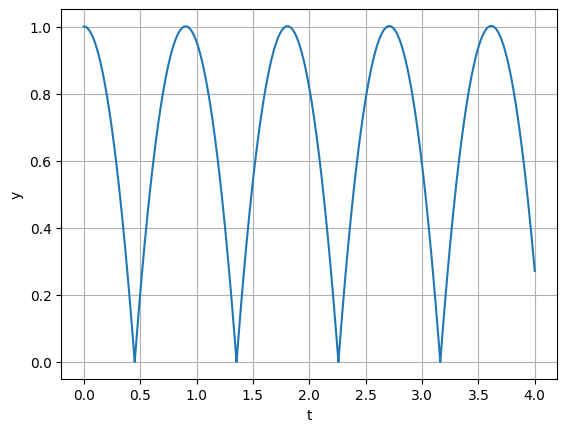

In [10]:
Y_real = trace_y(40000)
plot_function(Y_real[:2], 't', 'y')

**Моделирование изменения координат по оси x**

In [11]:
def trace_x(iterations: int) -> tuple[list[float], list[float]]:
    X: list[float] = []
    T: list[float] = []
    T_4 = Y_real[2]
    x_current: float = x0
    vx_current: float = 0.0
    t_current: float = 0.0
    acceleration_coefficient: int = 1
    for i in range(iterations):
        #print(t_current, x_current, vx_current)
        X.append(x_current)
        T.append(t_current)
        vx_current = get_next_vx(vx_current, T_4, acceleration_coefficient)
        if x_stoppage_condition(x_current, vx_current):
            print(f"Near zero, t = {t_current}, x = {x_current}, vx = {vx_current}")
            acceleration_coefficient *= -1
            vx_current = get_next_vx(vx_current, T_4, acceleration_coefficient)
        x_current = get_next_x(x_current, vx_current)
        t_current += dt

    return X, T

Near zero, t = 0.4711999999999644, x = -0.002272751035751981, vx = 18.491622209273224
Near zero, t = 1.4134999999998608, x = 0.0014243963454919075, vx = -18.48377513852878
Near zero, t = 2.355400000000546, x = -0.002271181621600772, vx = 18.475928067784345
Near zero, t = 3.296900000002533, x = 0.001422826931345472, vx = -18.468080997039902


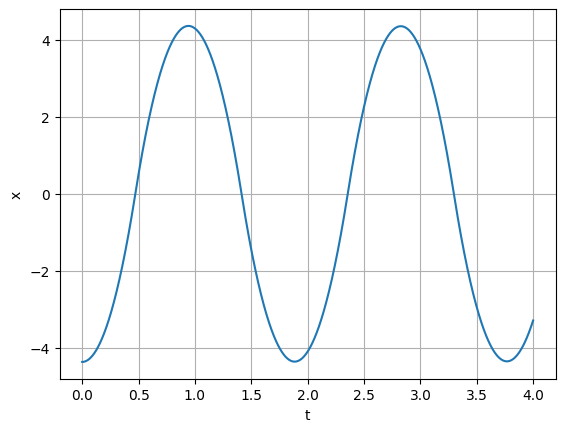

In [12]:
X_real = trace_x(40000)
plot_function(X_real, 't', 'x')

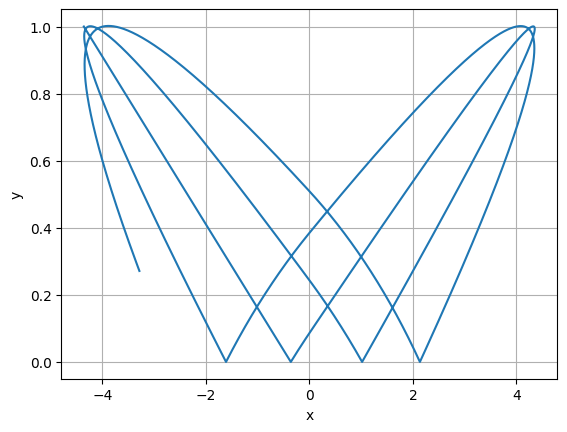

In [13]:
y_x_real = (Y_real[0], X_real[0])
plot_function(y_x_real, 'x', 'y')